# Introduction to the Scientific Libraries for Python

This Jupyter Notebook contains several basic exercises aimed to introduce you to the most widely used scientific libraries for Python: [numpy](https://numpy.org/), [pandas](https://pandas.pydata.org/), [scikit-learn](https://scikit-learn.org/stable/index.html), [matplotlib](https://matplotlib.org/index.html), and [seaborn](https://seaborn.pydata.org/).  
The exercises are kept short and relatively simple. Please refer to the references under the questions if you are stuck. You can refer to the notebook containing the solutions if you absolutely cannot move forward but please first try to figure out the solution yourself. 

You can run a cell either by clicking `Run` on the toolbar or by pressing `CTRL+RETURN`. Pressing `SHIFT+RETURN` will run the cell and move the pointer to the next one. For a complete list of keyboard shortcuts press `H`.

Run the cell below to import all the necessary libraries.

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Enable high resolution plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# NumPy Exercises
NumPy is the fundamental package for scientific computing with Python.  
Check out the [NumPy user guide](https://docs.scipy.org/doc/numpy/user/index.html#user).

## Arrays and Matrices

Create an array of 8 ones of type integer.  
Reference: [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html).

In [2]:
np.ones(8, dtype=int)

array([1, 1, 1, 1, 1, 1, 1, 1])

Create an array of 8 sevens of type float.  
Reference: [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html).

In [3]:
np.ones(8) * 7

array([7., 7., 7., 7., 7., 7., 7., 7.])

Create an array of integers in `[5, 20]`.  
Reference: [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html).

In [4]:
np.arange(5, 21)

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

Create an array of integers in `[5, 20]` that are divisible by 3.  
Reference: [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html).

In [5]:
np.arange(6, 21, 3)

array([ 6,  9, 12, 15, 18])

Create a 4x4 matrix containing all integers in `[5, 20]`.  
Reference: [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.reshape.html).

In [6]:
np.arange(5, 21).reshape(4, 4)

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

Create an array containing 21 evenly spaced values in `[-1, 1]`.  
Reference: [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html).

In [7]:
np.linspace(-1, 1, 21)

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

Run the next cell to generate the matrix `mat`.

In [8]:
mat = np.random.randint(1, 20, 12).reshape(3, 4)
print(mat)

[[ 7 19 16  3]
 [ 5  8  6  8]
 [ 9 18  3  7]]


Given the matrix `mat` solve the following tasks.

Display the shape of the matrix and the data type of its entries.  
Reference: [shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html), [dtype](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.dtype.html).

In [9]:
print(f'The matrix has {mat.shape[0]} rows and {mat.shape[1]} columns. It contains objects of type {mat.dtype}.')

The matrix has 3 rows and 4 columns. It contains objects of type int64.


Find the minimum and the maximum value of the matrix. Display them with their corresponding indices.  
Reference: [min](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html), [max](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html), [argmin](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.argmin.html), [argmax](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.argmax.html).

In [10]:
print(f'Minimum value {mat.min()} at index {mat.argmin()}')
print(f'Maximum value {mat.max()} at index {mat.argmax()}')

Minimum value 3 at index 3
Maximum value 19 at index 1


## Indexing and Broadcasting
Reference: [indexing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html), [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

Run the next cell to generate the array `arr`.

In [11]:
arr = np.linspace(-5, 5, 11, dtype=int)
print(arr)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]


Display the last element of `arr`.

In [12]:
arr[-1]

5

Display the first 5 elements of `arr`.

In [13]:
arr[:5]

array([-5, -4, -3, -2, -1])

Store a slice of `arr` containing values in range `[-3, 3]` in a variable `arr_slice`. Display `arr_slice`.

In [14]:
arr_slice = arr[2:-2]
arr_slice

array([-3, -2, -1,  0,  1,  2,  3])

Replace all values in `arr_slice` with 0. Display `arr_slice`.

In [15]:
arr_slice[:] = 0
arr_slice

array([0, 0, 0, 0, 0, 0, 0])

Display `arr`.  
Notice that the corresponding slice also changed in `arr` even though we did not alter it directly. This is because `arr_slice` is a view of the original data and not a copy.

In [16]:
arr

array([-5, -4,  0,  0,  0,  0,  0,  0,  0,  4,  5])

Now create a copy of the last 3 elements of `arr`. Call it `arr_copy`. Display `arr_copy`.  
Reference: [copy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.copy.html).

In [17]:
arr_copy = arr[-3:].copy()
arr_copy

array([0, 4, 5])

Replace the last element of `arr_copy` with 100. Display `arr_copy`.

In [18]:
arr_copy[-1] = 100
arr_copy

array([  0,   4, 100])

Display `arr`.  
Notice that the values in the original array were not affected by the changes made to a copy of its slice.

In [19]:
arr

array([-5, -4,  0,  0,  0,  0,  0,  0,  0,  4,  5])

Run the next cell to generate the matrix `mat`.

In [20]:
mat = np.random.randint(1, 20, 15).reshape(3, 5)
print(mat)

[[ 5 11  2 19  5]
 [11 16  3 17 13]
 [ 9  4  9 14 15]]


Display the last element in the first column of `mat`.

In [21]:
mat[-1, 0]

9

Display the second row of `mat`.

In [22]:
mat[1]

array([11, 16,  3, 17, 13])

Display the last column of `mat`.

In [23]:
mat[:, -1]

array([ 5, 13, 15])

Display the `2x3` slice from the top right corner of `mat`.

In [24]:
mat[:2, -3:]

array([[ 2, 19,  5],
       [ 3, 17, 13]])

Display the second, third, and fifth column of `mat`.

In [25]:
mat[:, [1, 2, 4]]

array([[11,  2,  5],
       [16,  3, 13],
       [ 4,  9, 15]])

Run the next cell to generate the array `arr`.

In [26]:
arr = np.arange(-7, 7, 1)
print(arr)

[-7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6]


Display the elements or `arr` that are greater than -2.

In [27]:
arr[arr > -2]

array([-1,  0,  1,  2,  3,  4,  5,  6])

Display the elements of `arr` with absolute values greater than 2.

In [28]:
arr[abs(arr) > 2]

array([-7, -6, -5, -4, -3,  3,  4,  5,  6])

Display the elements of `arr` in `[-1, 5]`.

In [29]:
arr[(arr >= -1) & (arr <= 5)]

array([-1,  0,  1,  2,  3,  4,  5])

## Operations

Create an array `arr1` containing integers in `[1, 10]` and an array `arr2` containing even integers in `[-4, 16)`.

In [30]:
arr1 = np.linspace(1, 10, 10)
arr2 = np.arange(-4, 16, 2)

Make sure that `arr1` and `arr2` have the same length.

In [31]:
len(arr1) == len(arr2)

True

Add the corresponding elements of `arr1` and `arr2` in two different ways.  
Reference: [add](https://docs.scipy.org/doc/numpy/reference/generated/numpy.add.html).

In [32]:
np.add(arr1, arr2)

array([-3.,  0.,  3.,  6.,  9., 12., 15., 18., 21., 24.])

In [33]:
arr1 + arr2

array([-3.,  0.,  3.,  6.,  9., 12., 15., 18., 21., 24.])

Subtract each element in `arr2` from the corresponding element in `arr1` in two different ways.  
Reference: [subtract](https://docs.scipy.org/doc/numpy/reference/generated/numpy.subtract.html).

In [34]:
np.subtract(arr1, arr2)

array([ 5.,  4.,  3.,  2.,  1.,  0., -1., -2., -3., -4.])

In [35]:
arr1 - arr2

array([ 5.,  4.,  3.,  2.,  1.,  0., -1., -2., -3., -4.])

Multiply the corresponding elements of `arr1` and `arr2` in two different ways.  
Reference: [multiply](https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html).

In [36]:
np.multiply(arr1, arr2)

array([ -4.,  -4.,   0.,   8.,  20.,  36.,  56.,  80., 108., 140.])

In [37]:
arr1 * arr2

array([ -4.,  -4.,   0.,   8.,  20.,  36.,  56.,  80., 108., 140.])

Divide each element of `arr1` by the corresponding element of `arr2` in two different ways. Notice that division by zero results in `inf`, a NumPy constant.  
Reference: [divide](https://docs.scipy.org/doc/numpy/reference/generated/numpy.divide.html), [constants](https://docs.scipy.org/doc/numpy/reference/constants.html).

In [38]:
np.divide(arr1, arr2)

/Users/geekybrick/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([-0.25      , -1.        ,         inf,  2.        ,  1.25      ,
        1.        ,  0.875     ,  0.8       ,  0.75      ,  0.71428571])

In [39]:
arr1 / arr2

/Users/geekybrick/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([-0.25      , -1.        ,         inf,  2.        ,  1.25      ,
        1.        ,  0.875     ,  0.8       ,  0.75      ,  0.71428571])

Calculate the following: $\log(\sqrt {arr_1} \cdot arr_2^3)$  
Step by step:
1. Compute the square root of `arr1`.  
Reference: [sqrt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html).
2. Compute `arr2` to the third power.  
Reference: [power](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html).
3. Compute the dot product of the vectors produced in steps 1 and 2.  
Reference: [dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html).
4. Compute the natural logarithm of the dot product.  
Reference: [log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html).
5. Display the result.

In [40]:
np.log(np.dot(np.sqrt(arr1), np.power(arr2, 3)))

9.833988809654358

Run the next cell to generate an array called `gauss`.

In [41]:
gauss = np.random.randn(100000)

The array `gauss` contains 100000 elements drawn randomly from a Gaussian distribution with expected value of 0 and variance of 1.  
Compute its mean and standard deviation. Compare the results to the distribution parameters ($\mu = 0, \sigma^2 = 1$).  
Reference: [mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html), [std](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html).

In [42]:
print('The absolute difference between the expected value and the observed mean is', round(np.mean(gauss), 4))
print('The absolute difference between the expected and observed standard deviation is', round(np.std(gauss), 4))

The absolute difference between the expected value and the observed mean is -0.0004
The absolute difference between the expected and observed standard deviation is 0.9991


# pandas Exercises

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.  
Check out the [pandas user guide](https://pandas.pydata.org/docs/user_guide/index.html).

Please go through the reference on [indexing and selecting data in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) before moving on to the tasks. The process is very similar to NumPy, but the documentation is still worth giving it a look.

## Series
A Series is built on top of the NumPy array object. As opposed to a NumPy array, a Series can be indexed by a label, instead of just a number location. A Series can also hold any arbitrary Python object and not only numbers.

Create a Series called `price` containing values 1, 2, 3, 4, and 5 labeled apple, banana, avocado, chicken, and fish. Display it.  
Reference: [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

In [43]:
# Multiple ways to do this
list_data = [1, 2, 3, 4, 5]
labels = ['apple', 'banana', 'avocado', 'chicken', 'fish']
price = pd.Series(data=list_data, index=labels)
# or
np_data = np.array([1, 2, 3, 4, 5])
price = pd.Series(data=np_data, index=labels)
# or
dict_data = {'apple': 1, 'banana': 2, 'avocado': 3, 'chicken': 4, 'fish': 5}
price = pd.Series(data=dict_data)

price

apple      1
banana     2
avocado    3
chicken    4
fish       5
dtype: int64

Create another Series called `amount` containing values 50, 30, 15, 20, and 25 with the same labels. Display it.  
Reference: [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

In [44]:
amount = pd.Series(data=[50, 30, 15, 20, 25], index=labels)
amount

apple      50
banana     30
avocado    15
chicken    20
fish       25
dtype: int64

What is the total cost of bananas?  
Reference: [multiply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.multiply.html).

In [45]:
price.multiply(amount)['banana']
# or
(price * amount)['banana']
# or (optimal)
price['banana'] * amount['banana']

60

What is the total cost of all goods?  
Reference: [dot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dot.html).

In [46]:
price.dot(amount)

360

## DataFrame
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

DataFrame structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.

Create a DataFrame called `goods` using `price` and `amount` from the Series part. Name the columns `price` and `amount`. Each row should contain an entry for each type of good. Display `goods`.  
Reference: [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [47]:
goods = pd.DataFrame(data={'price': price, 'amount': amount})
goods

,price,amount
apple,1,50
banana,2,30
avocado,3,15
chicken,4,20
fish,5,25


How many bananas are in stock?  
Reference: [at](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html).

In [48]:
goods.at['banana', 'amount']

30

Add a column containing the total cost per good. Name it `total_cost`.

In [49]:
goods['total_cost'] = goods['price'] * goods['amount']

Get the first three entries of `goods`.  
Reference: [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html).

In [50]:
goods.head(3)

,price,amount,total_cost
apple,1,50,50
banana,2,30,60
avocado,3,15,45


Run the next cell and proceed to the task below it.

In [51]:
goods['random'] = np.random.rand(goods.shape[0])
goods

,price,amount,total_cost,random
apple,1,50,50,0.843080
banana,2,30,60,0.949952
avocado,3,15,45,0.014575
chicken,4,20,80,0.217022
fish,5,25,125,0.099054


Oops! A `random` column was added to the data. Remove it.  
Reference: [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [52]:
goods.drop('random', axis=1, inplace=True)

Display the second, third and fourth entry in `goods`.  
Reference: [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [53]:
goods.iloc[1:4, :]

,price,amount,total_cost
banana,2,30,60
avocado,3,15,45
chicken,4,20,80


Display the goods that cost more than 2 and there are at least 18 items in stock.

In [54]:
goods[(goods['price'] > 2) & (goods['amount'] >= 18)]

,price,amount,total_cost
chicken,4,20,80
fish,5,25,125


Is the good with the least items in stock more expensive than the average price?  
Reference: [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html), [min](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html), [mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html).

In [55]:
goods.loc[goods['amount'] == goods['amount'].min(), 'price'][0] > goods['price'].mean()

False

Run the next cell and proceed to the task below it.

In [56]:
goods['demand'] = ['high', 'low', np.nan, 'low', np.nan]
goods.loc['banana', ['amount', 'total_cost']] = np.nan
goods

,price,amount,total_cost,demand
apple,1,50.0,50.0,high
banana,2,NaN,NaN,low
avocado,3,15.0,45.0,NaN
chicken,4,20.0,80.0,low
fish,5,25.0,125.0,NaN


A column `demand` was added to `goods`. Also, the `amount` and `total_cost` of bananas are missing.  
Drop all entries with a missing `amount`. Also, fill the missing demands with `medium`. Display the result.  
Reference: [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html), [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html).

In [57]:
goods.dropna(subset=['amount'], inplace=True)
goods.loc[:, 'demand'].fillna('medium', inplace=True)
goods

,price,amount,total_cost,demand
apple,1,50.0,50.0,high
avocado,3,15.0,45.0,medium
chicken,4,20.0,80.0,low
fish,5,25.0,125.0,medium


Run the next cell and proceed to the task below it.

In [58]:
goods.loc['eggs'] = [2.5, 50, 2.5*50, 'high']
goods.loc['juice'] = [2.5, 25, 2*25, 'medium']
goods

,price,amount,total_cost,demand
apple,1.0,50.0,50.0,high
avocado,3.0,15.0,45.0,medium
chicken,4.0,20.0,80.0,low
fish,5.0,25.0,125.0,medium
eggs,2.5,50.0,125.0,high
juice,2.5,25.0,50.0,medium


Two new entries, `eggs` and `juice` were added to `goods`.  
How many unique prices are there in `goods`? What are they?  
Reference: [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html), [nunique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html).

In [59]:
print('There are', goods['price'].nunique(), 'unique prices:', sorted(goods['price'].unique()))

There are 5 unique prices: [1.0, 2.5, 3.0, 4.0, 5.0]


# Matplotlib, Seaborn, Scikit-Learn Exercises

`matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python. See the [matplotlib user's guide](https://matplotlib.org/users/index.html).  
`seaborn` is a Python data visualization library based on `matplotlib`. It provides a high-level interface for drawing attractive and informative statistical graphics. Check out the [seaborn introduction](https://seaborn.pydata.org/introduction.html).  
`scikit-learn` is an open-source simple and efficient collection of tools for predictive data analysis built on `NumPy`, `SciPy`, and `matplotlib`. Check out the [scikit-learn user guide](https://scikit-learn.org/stable/user_guide.html).

We will use `seaborn` for plotting, since it produces more aesthetically pleasing graphs in a simpler manner than `matplotlib`. As the `seaborn` library is based on `matplotlib`, multiple `matplotlib` functions (setting the title, labels, axis names, plot sizing, etc.) will be covered in this exercise as well.  

Hint: don't forget to call `plt.show()` after buiding a plot, if you want to display it. Otherwise, you may unknowingly start building a new graph on top of the old one.

Use `NumPy` to generate an array of integers between 1 and 10. Store it in a variable `x`.

In [60]:
x = np.linspace(1, 10, 10, dtype=int)

Plot a simple line depicting the squared values of `x` against `x`.  
Reference: [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html).

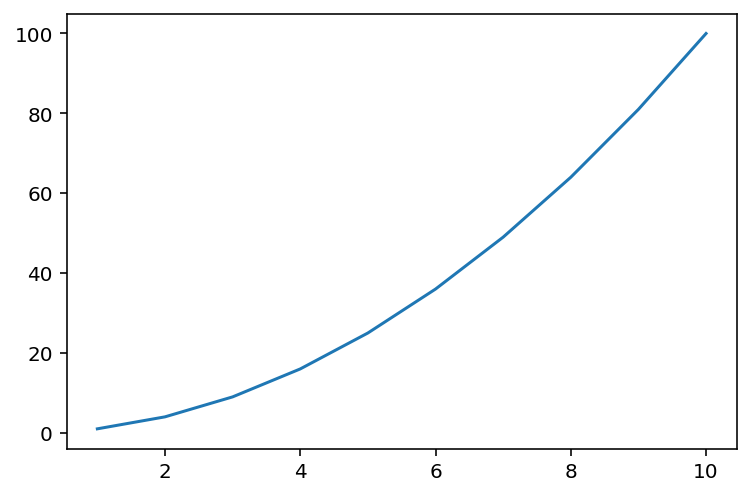

In [61]:
sns.lineplot(x, x**2)
plt.show()

Say, you want to compare linear $O(n)$ and quadratic $O(n^2)$ growth.  
Plot two lines on the same graph: one depicting the values of `x` and another one depicting the squared values of `x`. Let the first line be black and the second - red. Also, set the line width of both lines to 0.8 to make them look a bit more sharp.

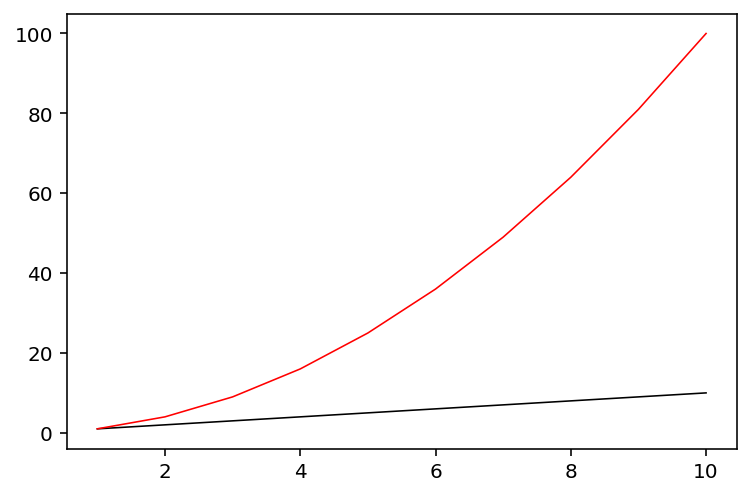

In [62]:
sns.lineplot(x, x, color='k', linewidth=.8)
sns.lineplot(x, x**2, color='r', linewidth=.8)
plt.show()

Run the next cell to generate the data for the next task.

In [63]:
height_m = np.random.normal(178, 9, 50)
height_f = np.random.normal(164, 7, 50)
weight_m = list()
weight_f = list()
for h in height_m:
    weight_m.append(round(h - 100 + np.random.rand() * 10))
for h in height_f:
    weight_f.append(round(h - 112 + np.random.rand() * 11))
weight_m = np.array(weight_m)
weight_f = np.array(weight_f)

Please note that all 'measurements' given below are generated and do not necessarily represent the reality. They are here for you to practice on.  
You are given 4 arrays, each containing 50 entries:
- `height_m` contains male height measurements
- `height_f` contains female height measurements
- `weight_m` contains male weight measurements
- `weight_f` contains female weight measurements

Perform the following tasks with the given data:
- Create a figure containing two subplots.  
Reference: [subplots](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html#examples-using-matplotlib-pyplot-subplots).
- Set the figure size to 12 by 4 inches.  
Reference: [set_size_inches](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.set_size_inches).
- Plot two separate scatter plots: one depicting male weight against male height, and the other one depicting female weight against female height. Set the color of the 'male' data points to green with an alpha of 0.5 and the color of the 'female' data points to yellow with an alpha of 0.9.  
Reference: [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).
- Set the titles of the graphs to 'male' and 'female' respectively.  
Reference: [set_title](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_title.html).
- Set the name of the horizontal axis to 'height' and the vertical one to 'weight' in both graphs.  
Reference: [set_xlabel](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html), [set_ylabel](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html).
- Set the x-limits to (140, 200) and the y-limits to (35, 110) for both graphs to keep the scale the same.  
Reference: [set_xlim](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html), [set_ylim](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_ylim.html).
- Set the title of the whole figure to 'Measurements'.  
Reference: [suptitle](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.suptitle.html).
- Finally, display the figure.

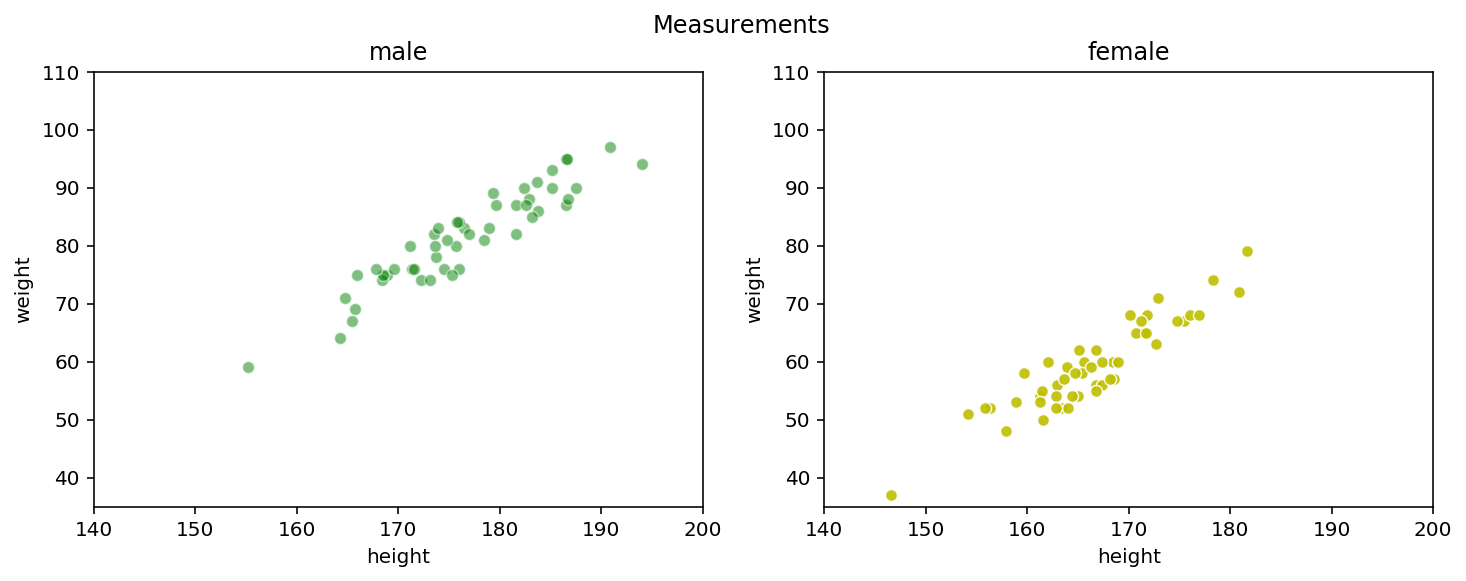

In [64]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
sns.scatterplot(height_m, weight_m, ax=ax[0], color='g', alpha=.5)
sns.scatterplot(height_f, weight_f, ax=ax[1], color='y', alpha=.9)
ax[0].set_xlim(140, 200)
ax[1].set_xlim(140, 200)
ax[0].set_ylim(35, 110)
ax[1].set_ylim(35, 110)
ax[0].set_xlabel('height')
ax[1].set_xlabel('height')
ax[0].set_ylabel('weight')
ax[1].set_ylabel('weight')
ax[0].set_title('male')
ax[1].set_title('female')
plt.suptitle('Measurements')
plt.show()

`scikit-learn` is a massive package, but we will only touch on the topic of regression in this notebook. Please feel free to explore their documentation page and play around with other prediction techniques.

Perform a simple linear regression based on the 'female' dataset using `scikit-learn`.  
Reference: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html).

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(np.reshape(height_f, (-1, 1)), np.reshape(weight_f, (-1, 1)))
pred = lin_reg.predict(height_f.reshape(-1, 1))

Plot a line corresponding to the best linear fit for your data over the scatter plot of the 'female' measurements. Add a legend to the plot. Place it in the lower right corner.  
Reference: [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html), [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), [legend](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.legend.html).

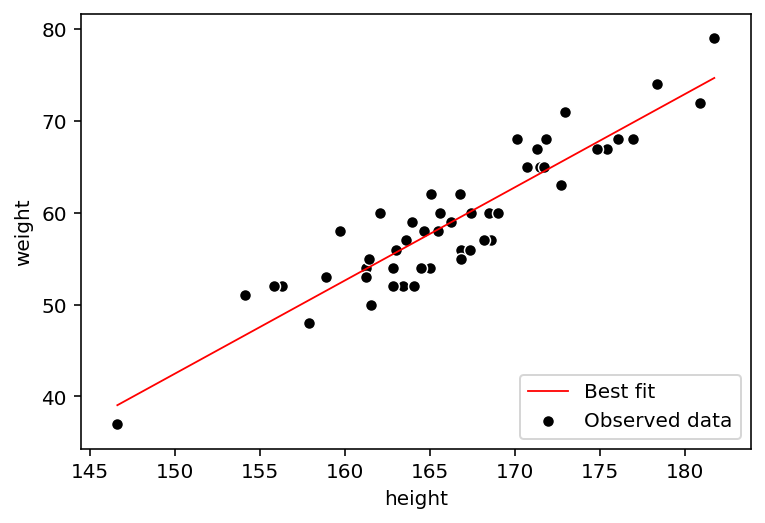

In [66]:
sns.lineplot(height_f, pred.reshape(50), color='r', linewidth=.9, label='Best fit')
sns.scatterplot(height_f, weight_f, color='k', label='Observed data')
plt.legend(loc=4)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

# Data Preparation and Analysis Project

Now you will have an opportunity to gain some insight into the process of data preparation and analysis using `numpy`, `pandas`, `sklearn`, `matplotlib`, and `seaborn` by completing a very simple but realistic "project".

It is often the case with operations research problems that no well-defined input for a particular mathematical model is available. In this case one needs to to first predict the inputs in order to be able to run the optimization model later.  
For this project, imagine that you work for an open-air mall **Aachen ORkaden** which is open around the clock. There are multiple optimization problems that one may encounter here, e.g., which types goods to offer and when; when should each shop in the mall open and close; how to organize the workforce efficiently; which kinds of entertainment to offer and when, etc.  
One of the most important inputs for most mathematical models we can build to solve those problems would be the expected number of visitors.  
It is now your task to explore and prepare the given data set `visitors_data.csv`, and then to predict the expected number of hourly visitors which could then be used as an input for the multiple optimization models. With our assitance, of course.  
Note: the actual optimization problems are outside of the scope of this short introduction to the python libraries for scientific programming. The problems above are given purely as an example.

A couple of hints: since the mall is open-air, we want to investigate, whether the number of visitors is influenced by the temperature or the cloud coverage outside. The number of visitors may also correlate with the time of day (some people prefer to sleep at night, although, admittedly, not all).  
The data set `visitors_data.csv` contains 4 columns:
- `temperature`: historical hourly temperature values in $^{\circ}C$
- `clouds`: cloud coverage in $\%$
- `date_time`: date and time of the measurent
- `visitors`: the recorded hourly number of visitors

Let us begin...

Import the data into a DataFrame.   
Reference: [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [67]:
df = pd.read_csv('visitors_data.csv')

Display the first 10 entries.  
Reference: [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html).

In [68]:
df.head(10)

,temperature,clouds,date_time,visitors
0,15.13,40,2012-10-02 09:00:00,4436.0
1,16.21,75,2012-10-02 10:00:00,4516.0
2,16.43,90,2012-10-02 11:00:00,4767.0
3,16.98,90,2012-10-02 12:00:00,5026.0
4,17.99,75,2012-10-02 13:00:00,4918.0
5,18.57,1,2012-10-02 14:00:00,5181.0
6,20.02,1,2012-10-02 15:00:00,5584.0
7,20.71,1,2012-10-02 16:00:00,6015.0
8,20.99,20,2012-10-02 17:00:00,6949.2
9,19.95,20,2012-10-02 18:00:00,7155.0


Check the data type of the `date_time` feature. What is it?  
Reference: [dtype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dtype.html).

In [69]:
print('Data type before conversion:', df['date_time'].dtype)

Data type before conversion: object


If it is not `datetime64`, convert it to such.  
The `datetime64` data type allows us to perform operations on date and time features. This will be needed for the next step.  
Display the data type again to make sure it was converted correctly.  
Reference: [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

In [70]:
df['date_time'] = pd.to_datetime(df['date_time'])
print('Data type after conversion:', df['date_time'].dtype)

Data type after conversion: datetime64[ns]


Create a column `date` containing the date and a column `hour` containing the hour of the measurement using the data in the column `date_time`.  
Remove the `date_time` column since it is no longer needed.  
Display the last 5 entries of the edited DataFrame.  
Reference: [dt.date](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.date.html), [dt.hour](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html), [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html), [tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html).

In [71]:
df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour
df.drop('date_time', axis=1, inplace=True)

In [72]:
df.tail()

,temperature,clouds,visitors,date,hour
48199,10.30,75,7086.0,2018-09-30,19
48200,9.61,90,6118.2,2018-09-30,20
48201,9.58,90,4533.9,2018-09-30,21
48202,8.94,90,3625.0,2018-09-30,22
48203,8.97,90,2575.8,2018-09-30,23


Use a box plot of `temperature` with whiskers representing a distance of 1.5 times the IQR to determine the outliers.  
Reminder: the values below the lower-whisker and above the upper-whisker are considered outliers.  
Reference: [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

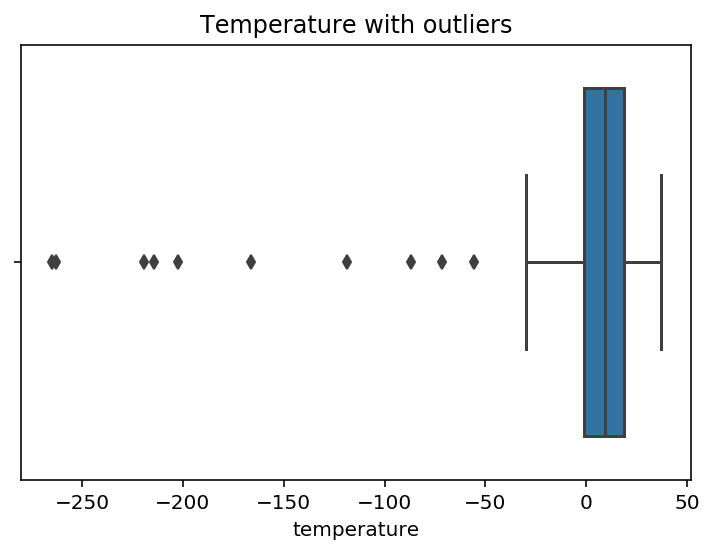

In [73]:
sns.boxplot(df['temperature'])
plt.title('Temperature with outliers')
plt.show()

Remove the entries containing the outliers from `visitors_data`.

In [74]:
# Calculate the IQR
Q1 = df['temperature'].quantile(0.25)
Q3 = df['temperature'].quantile(0.75)
IQR = Q3 - Q1

# Remove the outliers (values that are less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR)
df = df[~((df['temperature'] < (Q1 - 1.5 * IQR)) | (df['temperature'] > (Q3 + 1.5 * IQR)))]

Display the cleaned `temperature` data using a box plot again. Make sure that the outliers were removed correctly.  
Reference: [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

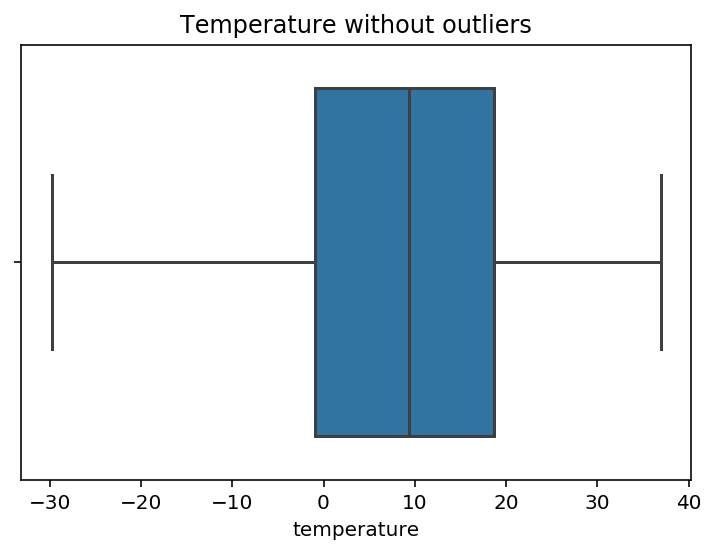

In [75]:
sns.boxplot(df['temperature'])
plt.title('Temperature without outliers')
plt.show()

Reset the index of `visitors_data` so that it is consistent with the number of data points.  
Reference: [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html).

In [76]:
df.reset_index(inplace=True, drop=True)

Check whether the `visitors` column contains missing (NaN) values. If yes, how many?  
Reference: [isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isna.html).

In [77]:
print(f"There are {df[df['visitors'].isna()].shape[0]} missing values.")

There are 625 missing values.


Compute the average number of `visitors` grouped by `hour`. The mean value of a column is not influenced by the NaN values.  
Reference: [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

In [78]:
hour_df = df.groupby(['hour']).mean()['visitors']

Impute the missing `visitors` data by substituting the missing values with the rounded average number of visitors for the specific hour (using the numbers from the previous step).  
Note: imputation using mean values is often suboptimal. It does account for uncertainty of the measurements, does not factor the correlations between features, and does not work for categorical features. At the same time it is very easy and fast to implement, and works well with small data sets containing numerical data (like ours).  
There are not that many missing values in our data set (around 1%). We are also respecting the fact, that, for example, the number of visitors will be lower at night than during the day by taking the mean over the values for a specific hour of the day and not over the entire data set. Hence, the risk to introduce bias is low.  
Please refer to external literature if you would like to learn about other imputation methods.  
Reference: [where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html), [assign](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html).

In [79]:
imputed_visitors = np.where(df.loc[:, 'visitors'].isna(), round(hour_df[df['hour']]), df['visitors'])
df = df.assign(visitors=imputed_visitors.astype(int))

Are there missing values for the `clouds` feature? If yes, how many?  
Reference: [isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isna.html).

In [80]:
print(f"There are {df[df['clouds'].isna()].shape[0]} missing values.")

There are 0 missing values.


Now that we removed/imputed the missing values, we can focus on determining the expected hourly number of visitors.  
First we need to determine which feature correlates with our target feature `visitors` the most.  
Display the correlations between `temperature`/`clouds`/`hour` and `visitors`. Which feature has the strongest correlation with `visitors`?  
Reference: [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html).

In [81]:
print('Correlation between temperature and visitors:', round(df['temperature'].corr(df['visitors']), 2))
print('Correlation between clouds and visitors:', round(df['clouds'].corr(df['visitors']), 2))
print('Correlation between hour and visitors:', round(df['hour'].corr(df['visitors']), 2))
print('hour has the highest correlation coefficient.')

Correlation between temperature and visitors: 0.18
Correlation between clouds and visitors: 0.04
Correlation between hour and visitors: 0.8
hour has the highest correlation coefficient.


Plot `visitors` against `hour`.  
Reference: [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html).

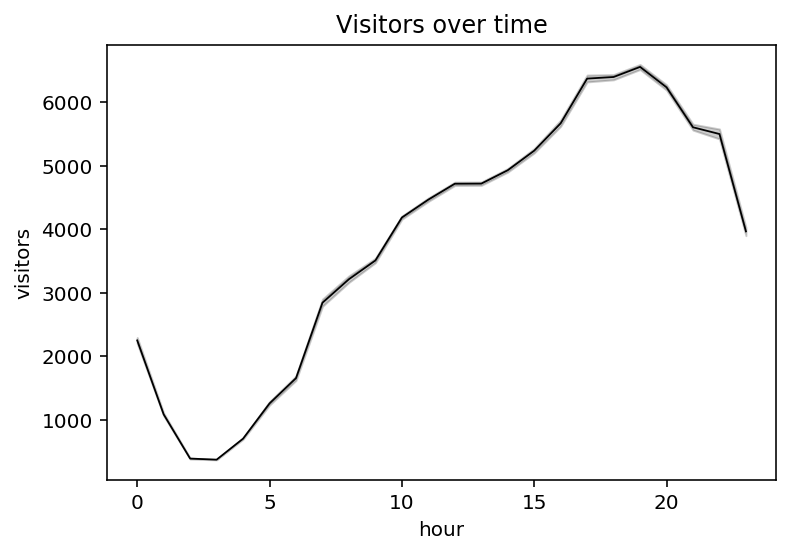

In [82]:
sns.lineplot(df['hour'], df['visitors'], linewidth=.9, color='k')
plt.title('Visitors over time')
plt.show()

When is the usual number of visitors the highest? The lowest?  
Do you find the results surprising? Can you explain them?  
Reference: [idxmax](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmax.html), [idxmin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmin.html).

In [83]:
print(f"There is usually the most visitors at {hour_df.idxmax()} o'clock and the least at {hour_df.idxmin()} o'clock.")

There is usually the most visitors at 19 o'clock and the least at 3 o'clock.


Now to the last step. Since we have concluded that `temperature` correlates strongly with `visitors`, we will use it to compute the expected number of hourly `visitors`.  
There are, of course, multiple methods we could use to predict the number of visitors (SVMs, neural networks, etc.). Since this exercise is focused on giving you a basic idea of data preparation and analysis, we will stick with arguably the simplest of them - the good old regression.  
For this task we will use polynomial regression. Also, for simplicity purposes we will not split the historical data into a training and a test set (which some may consider a crime). We still advise you to read about over-/under-fitting of models and the evaluation of prediction methods to gain a better understanding of why these concepts are important. [This post](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) explains the concepts in simple terms, please give it a look.  
Alright, back to the task...

Use `scikit-learn` to create a third order polynomial regression model, to train it, and to predict the hourly number of visitors. Once again, the selection of the order of the polynomial is not trivial. The 'best' degree (the one that produces the most accurate model while avoiding over-fitting) can be determined using a training and a test set. We will stick to the 3rd degree for this task.  
Reference: [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.reshape.html).

In [84]:
poly_features = PolynomialFeatures(3)
lin_reg = LinearRegression()
hour_poly = poly_features.fit_transform(np.array(df['hour'].values).reshape(-1, 1))
lin_reg.fit(hour_poly, df['visitors'])
visitors_pred = lin_reg.predict(poly_features.fit_transform(np.array(hour_df.index).reshape(-1, 1)))

Finally, plot the best fit of the polynomial regression over the historical data.  
Reference: [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html).

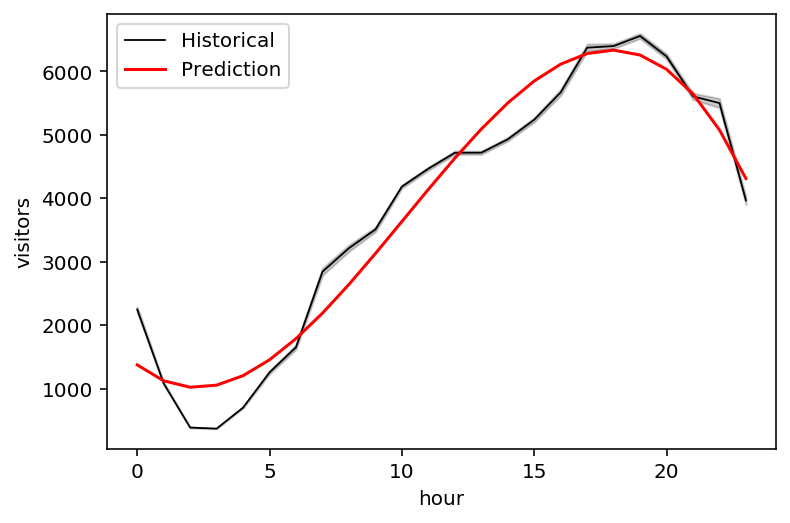

In [85]:
sns.lineplot(df['hour'], df['visitors'], color='k', label='Historical', linewidth=.9)
sns.lineplot(hour_df.index, visitors_pred, color="r", label='Prediction')
plt.show()

What is the $R^2$ of your model? Are you content with the result?  
Reference: [score](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score).

In [86]:
print('R^2 for the third order polynomial regression is', round(lin_reg.score(hour_poly, df['visitors']), 4))

R^2 for the third order polynomial regression is 0.7857


#### Congratulations! You are done with the task!

Now you can use the expected hourly number of visitors as an input for your mathematical optimization models (which is outside of the scope of this introductory exercise).

This is the end of this introduction to Python libraries for data analysis.  
All of the libraries have way more to offer than was presented in this notebook. We hope that you found this set of exercises interesting enough for you to continue exploring scientific programming with Python on your own.  
Please feel free to ask us any questions!